In [20]:
#Normal Equation

In [21]:
import numpy as np
#fake dataset
X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.rand(100, 1)

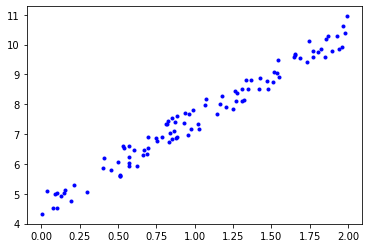

In [22]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")

In [23]:
#computing theta^ (theta_best)
X_b = np.c_[np.ones((100, 1)), X] #add x0 = 1 to reach instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("theta^ = ", theta_best)

theta^ =  [[4.55307389]
 [2.94371283]]


In [24]:
#Since we used 4 + 3*X, it was expected to be 4 and 3, but the result is close enough
#NOw we can use theta_best to make predictions

In [25]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.55307389],
       [10.44049955]])

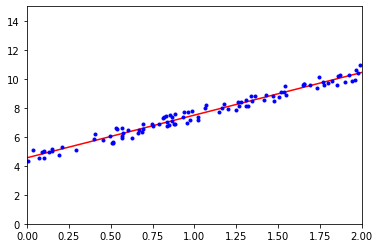

In [26]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [28]:
#Using scikit learn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

/Users/tiagofroes/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


(array([4.55307389]), array([[2.94371283]]))

In [29]:
lin_reg.predict(X_new)

array([[ 4.55307389],
       [10.44049955]])

In [30]:
#Exploring Linear Regression
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print("Theta^: ", theta_best_svd)

Theta^:  [[4.55307389]
 [2.94371283]]


In [31]:
#Using the pseudoinverse
np.linalg.pinv(X_b).dot(y)

array([[4.55307389],
       [2.94371283]])

In [49]:
#Batch Gradient descent
eta = 0.1  #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  #random initialization
print(theta)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print(theta)

[[-0.10107683]
 [ 0.85105651]]
[[4.55307389]
 [2.94371283]]


In [56]:
#implementing SGD
n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.rand(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]

        gradients = 2*xi.T.dot(xi.dot(theta) - yi)

        eta = learning_schedule(epoch*m+i)
        theta = theta-eta*gradients

print(theta)

[[4.55056282]
 [2.95014905]]


In [57]:
#scikit-learn SGD
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.51716224]), array([2.94482462]))

In [63]:
#Mini batch SGD
n_iterations = 50
minibatch_size = 10

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 5, 50

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients

print(theta)

[[4.52000373]
 [2.97154744]]


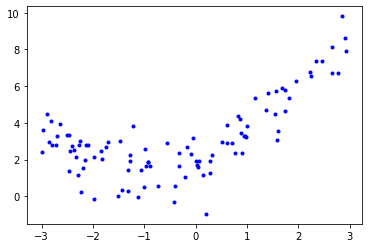

In [68]:
#Polynomial Regression

#fake data
m = 100
X = 6*np.random.rand(m,1)-3
y = (0.5*X**2)+X+2+np.random.randn(m,1)
plt.plot(X, y, "b.")

In [74]:
#Transforming the dataset to get second order features
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [81]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[1.96301211] [[0.94048827 0.48463253]]


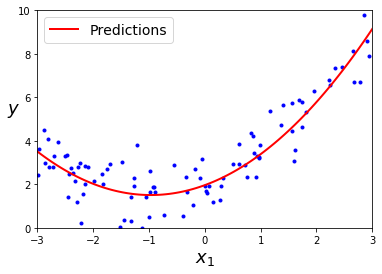

In [82]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()